<a href="https://colab.research.google.com/github/tracyhua2/DS3001/blob/main/Labs/Lab_4_Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Name:** Tracy Hua

## **Computing ID:** njn4gb

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Lab 4: Unsupervised Learning (100 Points)

In this lab, we will implement 2 models in the unsupervised learning family **K-means clustering** and **Principal Component Analysis (PCA)**.

You will utilize the skills you have gained over the semester to build, explore, and evaluate your models. As always, you will be graded on your model building and interpretation of  results rather than specific performance.

![](https://miro.medium.com/v2/resize:fit:1400/format:webp/0*h-lAg5H-ZNDRXxX2.png)

# **Part 1: K-Means Clustering (50 points)**

## For Part 1, you will pick from the following preloaded datasets:



In [51]:
pokemon_df = pd.read_csv("https://gist.githubusercontent.com/armgilles/194bcff35001e7eb53a2a8b441e8b2c6/raw/92200bc0a673d5ce2110aaad4544ed6c4010f687/pokemon.csv")

In [52]:
# Load Fashion MNIST data
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

**Another option open to you, if you wish, is to  utilize a dataset of your choice (including your final project dataset).**


In a text cell, answer the following exploratory questions and support your observations with any code, if needed.

## **Question 1 (5 points):**
## Read in your dataset as a Pandas DataFrame. Show the first 5 rows. How many rows and columns do you have?

## What are your features and their datatypes?

In [53]:
print(pokemon_df.head(5))

   #                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False  


In [54]:
print(pokemon_df.shape)

(800, 13)


In [55]:
features = pokemon_df.drop(columns=['#','Name'])
print(features.head())

  Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
0  Grass  Poison    318  45      49       49       65       65     45   
1  Grass  Poison    405  60      62       63       80       80     60   
2  Grass  Poison    525  80      82       83      100      100     80   
3  Grass  Poison    625  80     100      123      122      120     80   
4   Fire     NaN    309  39      52       43       60       50     65   

   Generation  Legendary  
0           1      False  
1           1      False  
2           1      False  
3           1      False  
4           1      False  


In [56]:
print(features.dtypes)

Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object


**There is a total of 800 rows and 13 columns. The features are Type 1, Type 2, Total, HP, Attack, Defense, Sp. Atk, Sp. Def, Speed, Generation, and Legendary. The data types are object, object, int64, int64, int64, int64, int64, int64, int64, int64, and bool, respectively.**

## **Question 2 (5 points):**
## Identify what percentage of each column has missing values and display this information (column name, percentage values missing) in a DataFrame.

## Then, fill in any missing values using any method appropriate for each column's data type and values.

In [57]:
NA_df = pd.DataFrame((pokemon_df.isna().sum()/pokemon_df.count())*100, columns=['Percent Missing'])
print(NA_df)

            Percent Missing
#                  0.000000
Name               0.000000
Type 1             0.000000
Type 2            93.236715
Total              0.000000
HP                 0.000000
Attack             0.000000
Defense            0.000000
Sp. Atk            0.000000
Sp. Def            0.000000
Speed              0.000000
Generation         0.000000
Legendary          0.000000


In [58]:
# impute missing values (NA) in 'Type 2' column using mode value
mode_value = pokemon_df['Type 2'].mode()[0]
pokemon_df['Type 2'].fillna(mode_value, inplace=True)
print(pokemon_df.head())

   #                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire  Flying    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False  


<ipython-input-58-8e4564b0a045>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pokemon_df['Type 2'].fillna(mode_value, inplace=True)


## **Question 3 (5 points):**
## Identify columns in your DataFrame that need to be encoded and use the proper encoder for each feature to transform your categorical data into numerical features.

## In a sentence per each encoded feature, justify your choice in encoder and why you utilized it

In [59]:
# count of unique responses in Type 1
pokemon_df['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [60]:
# count of unique responses in Type 2
len(pokemon_df['Type 2'].unique())

18

In [61]:
pokemon_df['Legendary'].unique()

array([False,  True])

In [62]:
# columns that need to be encoded: Type 1, Type 2, Legendary

# Type 1 & Type 2 using OneHotEncoder where 1 if True, 0 otherwise
pokemon_df['Type 1'] = pokemon_df['Type 1'].astype("string")
pokemon_df['Type 2'] = pokemon_df['Type 2'].astype("string")
pokemon_df = pd.get_dummies(pokemon_df, columns=['Type 1','Type 2'], drop_first=True, dtype=int)
print(pokemon_df.head())

   #                   Name  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  \
0  1              Bulbasaur    318  45      49       49       65       65   
1  2                Ivysaur    405  60      62       63       80       80   
2  3               Venusaur    525  80      82       83      100      100   
3  3  VenusaurMega Venusaur    625  80     100      123      122      120   
4  4             Charmander    309  39      52       43       60       50   

   Speed  Generation  ...  Type 2_Ghost  Type 2_Grass  Type 2_Ground  \
0     45           1  ...             0             0              0   
1     60           1  ...             0             0              0   
2     80           1  ...             0             0              0   
3     80           1  ...             0             0              0   
4     65           1  ...             0             0              0   

   Type 2_Ice  Type 2_Normal  Type 2_Poison  Type 2_Psychic  Type 2_Rock  \
0           0              0

In [63]:
# Legendary convert to binary
pokemon_df['Legendary'] = pokemon_df['Legendary'].astype(int)
print(pokemon_df['Legendary'].head())

0    0
1    0
2    0
3    0
4    0
Name: Legendary, dtype: int64


**I encoded Type 1 and Type 2 with OneHotEncoder via pd.get_dummies because they are categorical variables with no ordinal relationships. This encoding allows the model to interpret each type independently without assuming hierarchy. I convered Legendary to a binary integer because its a boolean feature (True/False) and representingit as 1 or 0 is the most efficient way to make it numerical.**

## **Question 4 (5 points):**
## Finally, identify your numerical columns and apply both standardization and normalization.

## Display each numerical column name and its minimum and maximum values in a DataFrame after these 2 processes.

## In 2 to 3 sentences, summarize the DataFrame and the effects of your choice in standardization and normalization had on your numerical features? Why would scaling your data be beneficial for unsupervised learning?

In [64]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [65]:
# standardization
numeric_cols = ['Total','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','Generation']

std_scaler = StandardScaler()
pokemon_df[numeric_cols] = std_scaler.fit_transform(pokemon_df[numeric_cols])
print(pokemon_df)

       #                   Name     Total        HP    Attack   Defense  \
0      1              Bulbasaur -0.976765 -0.950626 -0.924906 -0.797154   
1      2                Ivysaur -0.251088 -0.362822 -0.524130 -0.347917   
2      3               Venusaur  0.749845  0.420917  0.092448  0.293849   
3      3  VenusaurMega Venusaur  1.583957  0.420917  0.647369  1.577381   
4      4             Charmander -1.051836 -1.185748 -0.832419 -0.989683   
..   ...                    ...       ...       ...       ...       ...   
795  719                Diancie  1.375429 -0.754692  0.647369  2.443765   
796  719    DiancieMega Diancie  2.209541 -0.754692  2.497104  1.160233   
797  720    HoopaHoopa Confined  1.375429  0.420917  0.955658 -0.444182   
798  720     HoopaHoopa Unbound  2.042718  0.420917  2.497104 -0.444182   
799  721              Volcanion  1.375429  0.420917  0.955658  1.481116   

      Sp. Atk   Sp. Def     Speed  Generation  ...  Type 2_Ghost  \
0   -0.239130 -0.248189 -0.8015

In [66]:
# normalization
norm_scaler = MinMaxScaler()
pokemon_df[numeric_cols] = norm_scaler.fit_transform(pokemon_df[numeric_cols])
print(pokemon_df)

       #                   Name     Total        HP    Attack   Defense  \
0      1              Bulbasaur  0.230000  0.173228  0.237838  0.195556   
1      2                Ivysaur  0.375000  0.232283  0.308108  0.257778   
2      3               Venusaur  0.575000  0.311024  0.416216  0.346667   
3      3  VenusaurMega Venusaur  0.741667  0.311024  0.513514  0.524444   
4      4             Charmander  0.215000  0.149606  0.254054  0.168889   
..   ...                    ...       ...       ...       ...       ...   
795  719                Diancie  0.700000  0.192913  0.513514  0.644444   
796  719    DiancieMega Diancie  0.866667  0.192913  0.837838  0.466667   
797  720    HoopaHoopa Confined  0.700000  0.311024  0.567568  0.244444   
798  720     HoopaHoopa Unbound  0.833333  0.311024  0.837838  0.244444   
799  721              Volcanion  0.700000  0.311024  0.567568  0.511111   

      Sp. Atk   Sp. Def     Speed  Generation  ...  Type 2_Ghost  \
0    0.298913  0.214286  0.2285

In [67]:
# display each numerical column name
print(numeric_cols)

['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']


In [68]:
# min of each numerical column after standardization and normalization
print(pokemon_df[numeric_cols].min())

Total         0.0
HP            0.0
Attack        0.0
Defense       0.0
Sp. Atk       0.0
Sp. Def       0.0
Speed         0.0
Generation    0.0
dtype: float64


In [69]:
# max of each numerical column after standardization and normalization
print(pokemon_df[numeric_cols].max())

Total         1.0
HP            1.0
Attack        1.0
Defense       1.0
Sp. Atk       1.0
Sp. Def       1.0
Speed         1.0
Generation    1.0
dtype: float64


**The methods I used to standardize and normalize my data caused the values of my data to range from 0 to 1. The DataFrame contains the numerical features, Total, HP, Attack, Defense, Sp. Atk, Sp. Def, Speed, and Generation, along with other categorical features.**

**I think scaling your data is helpful for unsupervised learning because the standardization converted the numerical features into z-scores (centering the data around 0), while normalization rescaled then between 0 and 1, ensuring that each feature contributes equally for unsupervised learning tasks without being dominated by larger numeric ranges.**

## **Question 5 (7 points):**
## Create a function to instantiate K-Means Clustering model with a user inputted parameter for "k" number clusters. Also tune a minimum of 3 hyperparameters of your choice, referencing documentation as necessary:
* https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html  


## Fit your model to your data, adding your predictions in a column of your DataFrame called cluster. Return this new dataframe in your function. Call your function on your data with k = 3.

In [70]:
from sklearn.cluster import KMeans

In [71]:
features = pokemon_df.drop(columns=['#','Name'])
print(features.head())

      Total        HP    Attack   Defense   Sp. Atk   Sp. Def     Speed  \
0  0.230000  0.173228  0.237838  0.195556  0.298913  0.214286  0.228571   
1  0.375000  0.232283  0.308108  0.257778  0.380435  0.285714  0.314286   
2  0.575000  0.311024  0.416216  0.346667  0.489130  0.380952  0.428571   
3  0.741667  0.311024  0.513514  0.524444  0.608696  0.476190  0.428571   
4  0.215000  0.149606  0.254054  0.168889  0.271739  0.142857  0.342857   

   Generation  Legendary  Type 1_Dark  ...  Type 2_Ghost  Type 2_Grass  \
0         0.0          0            0  ...             0             0   
1         0.0          0            0  ...             0             0   
2         0.0          0            0  ...             0             0   
3         0.0          0            0  ...             0             0   
4         0.0          0            0  ...             0             0   

   Type 2_Ground  Type 2_Ice  Type 2_Normal  Type 2_Poison  Type 2_Psychic  \
0              0          

In [72]:
# function
def k_means(k,df):
  kmeans = KMeans(n_clusters=k, random_state=3001, max_iter=500, init='random')
  pokemon_df['cluser'] = kmeans.fit_predict(features)
  return df

In [75]:
cluster_df = k_means(3, pokemon_df)
print(cluster_df.head())

   #                   Name     Total        HP    Attack   Defense   Sp. Atk  \
0  1              Bulbasaur  0.230000  0.173228  0.237838  0.195556  0.298913   
1  2                Ivysaur  0.375000  0.232283  0.308108  0.257778  0.380435   
2  3               Venusaur  0.575000  0.311024  0.416216  0.346667  0.489130   
3  3  VenusaurMega Venusaur  0.741667  0.311024  0.513514  0.524444  0.608696   
4  4             Charmander  0.215000  0.149606  0.254054  0.168889  0.271739   

    Sp. Def     Speed  Generation  ...  Type 2_Grass  Type 2_Ground  \
0  0.214286  0.228571         0.0  ...             0              0   
1  0.285714  0.314286         0.0  ...             0              0   
2  0.380952  0.428571         0.0  ...             0              0   
3  0.476190  0.428571         0.0  ...             0              0   
4  0.142857  0.342857         0.0  ...             0              0   

   Type 2_Ice  Type 2_Normal  Type 2_Poison  Type 2_Psychic  Type 2_Rock  \
0         

## **Question 6 (5 points):**
## Write code to plot your predicted clusters, with different colors for different cluster numbers. Apply this code to the predictions you obtained in Question 5 and describe the output.

## In a minimum of 3 sentences, based on all the information you have, describe why k = 3 seems like a reasonable or unreasounable amount of clusters for your data.

**Because the predicted clusters show XYZ, I believe k=3 is/is not a reasonable choice...**

## **Question 7 (8 points):**
## Plot an elbow plot for your clustering model with any metric of your choice and pick an optimal k value.

## Then, utilize the optimal k to tune at least 3 K-Means Clustering models by varying the hyperparameters. For each model, you will use the optimal k number of clusters you identified in your elbow plot but vary at least 3 other hyperparameters. Plot your predicted clusters differentiated by color.

Text(0.5, 1.0, 'Elbow Plot for Optimal K using Inertia')

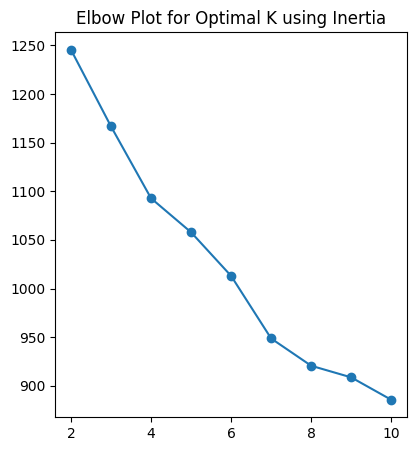

In [80]:
# elbow plot for optimal k value
inertia = []
for k in range(2,11):
  kmeans = KMeans(n_clusters=k, random_state=3001, max_iter=500, init='random')
  kmeans.fit(features)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(range(2,11), inertia, marker='o')
plt.title('Elbow Plot for Optimal K using Inertia')

## In a minimum of 5 sentences, reflect on your tuned models. Write what you judge the optimal amount of clusters to be and why. How do the plots of your clusters change with tuning specific parameters? Do your results make sense?

**I picked a k of X clusters because...**

**Yes. My tuned models make sense because...**

## **Question 8 (10 points):**
## Now, examine the makeup of your clusters. Create plots and visualizations that may explain your initial groupings.

## You may do this by color coding your clusters by a given feature or by examining descriptive statistics of each cluster (ie: cluster 1 has an average temperature of 15 while cluster 2....)

## Write a **10 to 15 sentence** reflection on why you think your clusters have oriented the way they display. Are you clusters similar are very different in their feature makeup? Are you clusters similarly sized or are some much larger or smaller? Are there any aspects of the clusters that don't make sense when compared your original data or targets?




**After examining my clusters, I believe the groupings make sense because....**

# **Part 2: Principal Component Analysis (50 Points)**

## **Question 1 (15 points):**
## Fit a PCA model to a dataset if your choice. Write code to visualize the first 2 principal components and color code your groups to differentiate them.



## **Question 2 (10 points):**
## Create 2 barplots:

*   The first barplot should show the percentage variance explained by each principal component

* The first barplot should show the **cumulative** percentage variance explained by each principal component. Add a horizontal red line on this graph depicting when the cumulative variance has hit 80%.


## Write 2 to 3 sentences on how many components explain 80% of the variability in your dataset. Are the results surprising given how much variance is in (or not in) your data? What features would you consider dropping based on your results and why?


**It tales N components to explain...**

**I would consider dropping...**

## **Question 3 (25 points):**
## Write **3 paragraphs**, supported by code and exploratory analysis, explaining and exploring the groupings you see in your data. Utilize data features to justify why the components that explain so much of the variance in your data are reasonable. Explain what kind of applications or decision making your analysis can help support.

## You may choose to explore beyond simply the first 2 principal components if you wish.



**The principal components show...**

**The PCs responsible for explaining the majority of variance...**

**These results can be used for...**

### Honor Pledge

On my honor as a student, I have neither given nor received unauthorized aid on this assignment.